# Question 1: Unexpected Plots 

In [1]:
from math import sqrt
from random import randrange, random
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

Defining the different vertices of a hexagon.
For now we assume the length of each side is one.

In [2]:
vertices = OrderedDict()
vertices["A"] = np.array([1,0])
vertices["B"] = np.array([1/2., np.sqrt(3)/2.])
vertices["C"] = np.array([-1/2., np.sqrt(3)/2.])
vertices["D"] = np.array([-1,0])
vertices["E"] = np.array([-1/2., -np.sqrt(3)/2])
vertices["F"] = np.array([1/2, -np.sqrt(3)/2])

In [3]:
# some utilitiy functions for computing the distance and centroids
def distance(x1, x2):
    x = x1-x2
    d = np.sqrt(sum(x**2))
    return d

def centroid(x1, verts, size):
    x2 = vertices[verts[0]]*size
    x3 = vertices[verts[1]]*size
    
    x = (x1+x2+x3)/3
    return x

In [4]:
# Here we use the coordinates of the vertices to define a list of adjacent vertices
# all adjecent vertices should have a distance of one.
keys = ["A", "B", "C", "D", "E", "F"]
adjacent = []
n_keys = len(keys)
for i in range(n_keys):
    for j in range(i+1, n_keys):
        dist = distance(vertices[keys[i]] ,vertices[keys[j]])
        if np.isclose(dist,1):
            adjacent.append((keys[i], keys[j]))

# Our final hexagon sampling function

In [5]:
def hexagon_generator(size):
    vectors = [(-1.,0),(1/2.,sqrt(3.)/2.),(1/2.,-sqrt(3.)/2.)]
    if not randrange(3*size*size+1): return (0,0)
    t = randrange(3);
    (v1,v2) = (vectors[t], vectors[(t+1)%3])
    (x,y) = (randrange(0,size),randrange(0,size))
    return (x*v1[0]+y*v2[0],x*v1[1]+y*v2[1])

def sample_points(state=None, size=10):
    if type(state) == type(None):
        P = hexagon_generator(size)
    else:
        P = state
    
    verts = adjacent[randrange(len(adjacent))]
    newP = centroid(P, verts, size)
    
    return newP

In [6]:
# sample 10000 points
num = 10000
state = None
points = np.zeros((num, 2))
for i in range(num):
    state = sample_points(state, 20)
    points[i] = state

### Scatter plot of the sample points

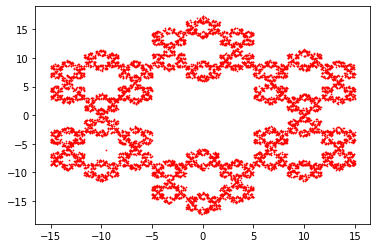

In [7]:
plt.scatter(points[:,0], points[:,1], s=0.5, c='r')
plt.show()

### Here ends the first question. Not sure what that figure is but it looks nice.

# Question 2: Datascience with Pandas and Movie Data

In [8]:
# importing the some necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [9]:
data_dir = "./" #https://drive.google.com/drive/folders/1dl6nw0HO9XVrT8dSBJHHn3mDW9EWQpXS?usp=sharing

basics = pd.read_csv(data_dir+"/title.basics.tsv.gz", sep='\t')
basics.head()

/home/ulrich/venv/datascience/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [10]:
# Check dataframe summary
basics.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5330276 entries, 0 to 5330275
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   tconst          5330276 non-null  object
 1   titleType       5330276 non-null  object
 2   primaryTitle    5330270 non-null  object
 3   originalTitle   5330270 non-null  object
 4   isAdult         5330276 non-null  int64 
 5   startYear       5330276 non-null  object
 6   endYear         5330276 non-null  object
 7   runtimeMinutes  5330276 non-null  object
 8   genres          5330274 non-null  object
dtypes: int64(1), object(8)
memory usage: 366.0+ MB


In [11]:
akas = pd.read_csv(data_dir+"/title.akas.tsv.gz", sep='\t')

akas.head()

/home/ulrich/venv/datascience/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [12]:
# Check dataframe summary
akas.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3423660 entries, 0 to 3423659
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          3423660 non-null  object
 1   ordering         3423660 non-null  int64 
 2   title            3423660 non-null  object
 3   region           3423605 non-null  object
 4   language         3423660 non-null  object
 5   types            3423660 non-null  object
 6   attributes       3423660 non-null  object
 7   isOriginalTitle  3423660 non-null  object
dtypes: int64(1), object(7)
memory usage: 209.0+ MB


In [13]:
ratings = pd.read_csv(data_dir+"/title.ratings.tsv.gz", sep='\t')

ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [14]:
# Check dataframe summary
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874203 entries, 0 to 874202
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         874203 non-null  object 
 1   averageRating  874203 non-null  float64
 2   numVotes       874203 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 20.0+ MB


### Drop duplicates in all the dataframes 

In [15]:
basics.drop_duplicates(subset ="tconst",
                     keep = False, inplace = True)
akas.drop_duplicates(subset ="titleId",
                     keep = False, inplace = True)
ratings.drop_duplicates(subset ="tconst",
                     keep = False, inplace = True)

### 3. Merging the dataframes

In [16]:
# rename tconst to titleId
basics = basics.rename(columns={'tconst':'titleId'})
ratings = ratings.rename(columns={'tconst':'titleId'})

In [17]:
from functools import reduce

dfs = [basics, akas, ratings]

df_inner = reduce(lambda left,right: pd.merge(left,right,on=['titleId'], how='inner'), dfs)
df_outer = reduce(lambda left,right: pd.merge(left,right,on=['titleId'], how='outer'), dfs)

In [18]:
print("inner produces shape: ",df_inner.shape)
print("outer produces shape: ",df_outer.shape)

inner produces shape:  (376260, 18)
outer produces shape:  (5333998, 18)


In [19]:
print(f"inner produces {len(df_inner.titleType.unique())} unique titleTypes")
print(f"outer produces {len(df_outer.titleType.unique())} unique titleTypes")

inner produces 10 unique titleTypes
outer produces 11 unique titleTypes


4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US') AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new. 

In [20]:
df_new = df_inner[((df_inner["language"]=="en") | (df_inner['region']=="US")) & (df_inner["titleType"].isin(['movie', 'tvMovie']))]
df_outer_new = df_outer[((df_outer["language"]=="en") | (df_outer['region']=="US")) & (df_outer["titleType"].isin(['movie', 'tvMovie']))]

In [21]:
# For the rest of the excercise, I will focus on the dataframe that was created using merge with argument 
# how set to inner 
df_new.head()

,titleId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,ordering,title,region,language,types,attributes,isOriginalTitle,averageRating,numVotes
119,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy",1,The Fairylogue and Radio-Plays,US,\N,\N,\N,0,5.9,26
231,tt0001159,movie,The Connecticut Yankee,The Connecticut Yankee,0,1910,\N,\N,\N,1,The Connecticut Yankee,US,\N,\N,\N,0,5.7,6
241,tt0001230,movie,Gentleman Joe,Gentleman Joe,0,1910,\N,\N,\N,1,Gentleman Joe,US,\N,\N,\N,0,5.0,6
271,tt0001482,movie,As in a Looking Glass,As in a Looking Glass,0,1911,\N,\N,Drama,1,As in a Looking Glass,US,\N,\N,\N,0,5.5,25
287,tt0001586,movie,A Dog's Tale,A Dog's Tale,0,1911,\N,\N,\N,1,A Dog's Tale,US,\N,\N,\N,0,4.5,6


5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column.

In [22]:
df_new["log10Votes"] = np.log10(df_new["numVotes"].values)

/home/ulrich/venv/datascience/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Lower the case of all text in the 'genres' column. 

In [23]:
df_new["genres"] = df_new["genres"].str.lower()

6. Using Groupby (or other technique) group all data by 'genres' and display the top 10 highest genres by:

In [24]:
# Grouping the data by genres
df_group = df_new.groupby(['genres']).mean()

In [25]:
df_group.nlargest(10, 'log10Votes')

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,documentary,sci-fi",0.0,1.0,7.2,4073.0,3.609914
"animation,crime,music",0.0,1.0,7.0,1485.0,3.171726
"animation,documentary,mystery",0.0,1.0,8.2,883.0,2.945961
"action,fantasy,musical",0.0,1.0,7.7,822.0,2.914872
"animation,fantasy,horror",0.0,1.0,4.1,749.0,2.874482
"music,sci-fi",0.0,1.0,5.7,719.0,2.856729
"family,horror,mystery",0.0,1.0,4.0,636.0,2.803457
"family,history",0.0,1.0,6.5,573.0,2.758155
"animation,comedy,musical",0.0,1.0,5.9,537.5,2.727610


In [26]:
df_group.nlargest(10, 'averageRating')

,isAdult,ordering,averageRating,numVotes,log10Votes
genres,,,,,
"action,crime,family",0.0,1.0,9.2,21.0,1.322219
"history,sport",0.0,1.0,9.2,5.0,0.698970
"comedy,music,talk-show",0.0,1.0,9.1,71.5,1.580983
"adventure,musical",0.0,1.0,9.0,5.0,0.698970
"adventure,biography,crime",0.0,1.0,8.9,41.0,1.612784
"action,adventure,reality-tv",0.0,1.0,8.8,13.0,1.113943
"action,animation,biography",0.0,1.0,8.8,214.0,2.330414
"documentary,news,reality-tv",0.0,1.0,8.8,8.0,0.903090
"family,musical,romance",0.0,1.0,8.8,15.0,1.176091


In [27]:
# Grouping the data by average rating
# Again here, I will aggregate using the mean
df_group_rating = df_new.groupby(['averageRating']).mean()

In [28]:
df_group_rating.head()

,isAdult,ordering,numVotes,log10Votes
averageRating,,,,
1.0,0.0,1.0,49.800000,1.200095
1.1,0.0,1.0,111.000000,2.045323
1.2,0.0,1.0,265.300000,2.172645
1.3,0.0,1.0,80.125000,1.522493
1.4,0.0,1.0,149.071429,1.882040


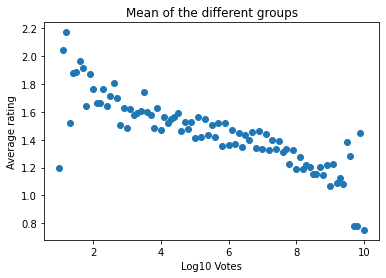

In [29]:
plt.scatter(df_group_rating.index, df_group_rating["log10Votes"])
plt.xlabel("Log10 Votes")
plt.ylabel("Average rating")
plt.title("Mean of the different groups")
plt.show()

### 8. Perform linear regression on your data (averageRating vs log10Votes) created in the previous step in three different ways:

<ol>
    <li>8.1 Using sklearn</li> 
    <li>8.2 Using scipy</li> 
    <li>8.3 Using pytorch</li> 
</ol>

In [30]:
# x-values for the regression will be the Average rating and y-values will be log 10 votes.
x_ = np.array(df_group_rating.index)
y_ = np.array(df_group_rating["log10Votes"])

# Standardising the input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_.reshape(-1,1))
x = scaler.transform(x_.reshape(-1,1)).squeeze()

scaler = StandardScaler()
scaler.fit(y_.reshape(-1,1))
y = scaler.transform(y_.reshape(-1,1)).squeeze()


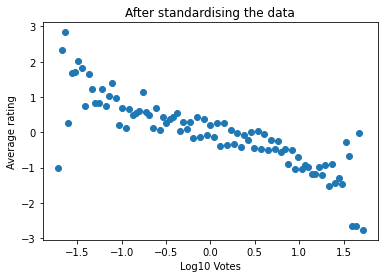

In [31]:
plt.scatter(x, y)
plt.xlabel("Log10 Votes")
plt.ylabel("Average rating")
plt.title("After standardising the data")
plt.show()

Using sklearn

In [32]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(x.reshape(-1,1), y)
sklearn_m ,sklearn_c = regr.coef_[0], regr.intercept_

print(f"Slope and intercept from sklearn linear regression are {sklearn_m} and {sklearn_c}.")

Slope and intercept from sklearn linear regression are -0.8494282759901052 and 3.3970653417641993e-16.


Using scipy

In [33]:
from scipy.stats import linregress
result = linregress(x, y)
scipy_m, scipy_c = result.slope, result.intercept

print(f"Slope and intercept from scipy stats linear regression are {scipy_m} and {scipy_c}.")

Slope and intercept from scipy stats linear regression are -0.8494282759901053 and 3.3970653417641993e-16.


Using pytorch

In [34]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor(x.reshape(-1,1)))
y_data = Variable(torch.Tensor(y))

In [35]:
class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [36]:
model = LinearRegressionModel()
loss_fn = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-3)

In [37]:
# for small dataset we will just use one batch
EPOCH = 1000
for epoch in range(EPOCH):
 
    # Forward pass: Compute predicted y by passing
    # x to the model
    pred_y = model(x_data)
 
    # Compute and print loss
    loss = loss_fn(pred_y, y_data)
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch %100 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 1.6810166835784912
epoch 100, loss 1.4563157558441162
epoch 200, loss 1.3057550191879272
epoch 300, loss 1.204871654510498
epoch 400, loss 1.1372746229171753
epoch 500, loss 1.091981053352356
epoch 600, loss 1.0616319179534912
epoch 700, loss 1.0412964820861816
epoch 800, loss 1.0276708602905273
epoch 900, loss 1.018540859222412


/home/ulrich/venv/datascience/lib/python3.8/site-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([91])) that is different to the input size (torch.Size([91, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [38]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.0328]], requires_grad=True)
Parameter containing:
tensor([0.1065], requires_grad=True)


Sklearn and scipy outputs the same results for the slope and intercept but pytorch is quite off.
The reason why pytorch doesn't do well in this case is because pytorch does not inhenrently perform the linear regression using analytical updates for the slope and intercept as sklearn and scipy. For pytorch, we used Stochastic Gradient descent, but we have very limited and that is not well spread. Because of the limited spread, gradient descent is succesptile to be getting stuck in local minima. This can be imporve be collecting more data with a wider spread or perhaps using a different model other than linear regression.